In [ ]:
import pandas as pd
import numpy as np
import mysql.connector
import config

import seaborn as sns
import matplotlib.pyplot as plt
%matploblib inline

# Pull data from SQL ---> DataFrame

In [12]:
database_cnx.close()
database_cursor.close()

True

In [13]:
database_cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd,
    database = config.DB_NAME
)
database_cursor = database_cnx.cursor(buffered=True)
print(database_cursor)

CMySQLCursorBuffered: (Nothing executed yet)


In [14]:
def read_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute( query )
        names = [ x[0] for x in cursor.description]
        rows = cursor.fetchall()
        return pd.DataFrame( rows, columns=names)
    finally:
        if cursor is not None:
            cursor.close()

In [15]:
query = '''
SELECT * FROM world_bank_index

'''

In [16]:
wbi = read_query(database_cnx, query)

In [17]:
wbi.head()

,Country,Regulatory_Quality,Political_Stability,Accountability,Rule_of_Law
0,Afghanistan,-1.327690,-2.671050,-1.039840,-1.498190
1,Albania,0.189022,0.344645,0.169949,-0.328867
2,Algeria,-1.171880,-1.097530,-0.863169,-0.857401
3,Andorra,0.871443,1.413420,1.176540,1.577920
4,Angola,-1.001380,-0.315899,-1.142930,-1.087320


In [22]:
wbi.columns

Index(['Country', 'Regulatory_Quality', 'Political_Stability',
       'Accountability', 'Rule_of_Law'],
      dtype='object')

In [23]:
wbi = wbi.rename(columns={'Country':'country','Regulatory_Quality':'regulatory_quality',
                   'Political_Stability':'political_stability','Accountability':'accountability',
                   'Rule_of_Law':'rule_of_law'})

In [24]:
wbi.head()

,country,regulatory_quality,political_stability,accountability,rule_of_law
0,Afghanistan,-1.327690,-2.671050,-1.039840,-1.498190
1,Albania,0.189022,0.344645,0.169949,-0.328867
2,Algeria,-1.171880,-1.097530,-0.863169,-0.857401
3,Andorra,0.871443,1.413420,1.176540,1.577920
4,Angola,-1.001380,-0.315899,-1.142930,-1.087320


In [18]:
query = '''
SELECT * FROM final
'''

In [19]:
main = read_query(database_cnx, query)

In [20]:
main.head()

,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita
0,Afghanistan,5.963890e+10,34600200.0,16,172,10,8.54149,1723.66
1,Albania,3.087580e+10,2927090.0,36,99,35,4.22116,10548.30
2,Algeria,5.536240e+11,40563900.0,35,105,35,138.72300,13648.20
3,Angola,1.768130e+11,28852900.0,19,165,22,21.41700,6128.08
4,Argentina,7.994760e+11,43897900.0,40,85,35,194.10000,18212.20


In [21]:
print( len(main),len(wbi))

167 202


In [25]:
main.merge(wbi,on='country',how='outer')

,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita,regulatory_quality,political_stability,accountability,rule_of_law
0,Afghanistan,5.963890e+10,3.460020e+07,16.0,172.0,10.0,8.541490,1723.660,-1.327690,-2.671050,-1.039840,-1.498190
1,Albania,3.087580e+10,2.927090e+06,36.0,99.0,35.0,4.221160,10548.300,0.189022,0.344645,0.169949,-0.328867
2,Algeria,5.536240e+11,4.056390e+07,35.0,105.0,35.0,138.723000,13648.200,-1.171880,-1.097530,-0.863169,-0.857401
3,Angola,1.768130e+11,2.885290e+07,19.0,165.0,22.0,21.417000,6128.080,-1.001380,-0.315899,-1.142930,-1.087320
4,Argentina,7.994760e+11,4.389790e+07,40.0,85.0,35.0,194.100000,18212.200,-0.469625,0.204626,0.492563,-0.393606
5,Armenia,2.344670e+10,2.921300e+06,35.0,105.0,35.0,5.219800,8026.120,0.250056,-0.662264,-0.579335,-0.119130
6,Australia,1.088900e+12,2.424600e+07,77.0,13.0,71.0,411.729000,44910.700,1.896970,1.047960,1.351010,1.755520
7,Austria,3.831180e+11,8.745720e+06,76.0,14.0,71.0,68.101200,43806.300,1.440440,0.909639,1.337420,1.814970
8,Azerbaijan,1.552090e+11,9.713940e+06,25.0,152.0,35.0,35.117400,15978.000,-0.282023,-0.803879,-1.563100,-0.519861
9,Bahrain,6.107620e+10,1.348410e+06,36.0,99.0,35.0,38.107500,45295.000,0.608239,-0.793426,-1.372130,0.456381


In [27]:
test = main.merge(wbi,on='country',how='inner')

In [28]:
test

,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita,regulatory_quality,political_stability,accountability,rule_of_law
0,Afghanistan,5.963890e+10,3.460020e+07,16,172,10,8.541490,1723.660,-1.327690,-2.671050,-1.039840,-1.498190
1,Albania,3.087580e+10,2.927090e+06,36,99,35,4.221160,10548.300,0.189022,0.344645,0.169949,-0.328867
2,Algeria,5.536240e+11,4.056390e+07,35,105,35,138.723000,13648.200,-1.171880,-1.097530,-0.863169,-0.857401
3,Angola,1.768130e+11,2.885290e+07,19,165,22,21.417000,6128.080,-1.001380,-0.315899,-1.142930,-1.087320
4,Argentina,7.994760e+11,4.389790e+07,40,85,35,194.100000,18212.200,-0.469625,0.204626,0.492563,-0.393606
5,Armenia,2.344670e+10,2.921300e+06,35,105,35,5.219800,8026.120,0.250056,-0.662264,-0.579335,-0.119130
6,Australia,1.088900e+12,2.424600e+07,77,13,71,411.729000,44910.700,1.896970,1.047960,1.351010,1.755520
7,Austria,3.831180e+11,8.745720e+06,76,14,71,68.101200,43806.300,1.440440,0.909639,1.337420,1.814970
8,Azerbaijan,1.552090e+11,9.713940e+06,25,152,35,35.117400,15978.000,-0.282023,-0.803879,-1.563100,-0.519861
9,Bahrain,6.107620e+10,1.348410e+06,36,99,35,38.107500,45295.000,0.608239,-0.793426,-1.372130,0.456381


In [30]:
# test.to_csv('merged')

done


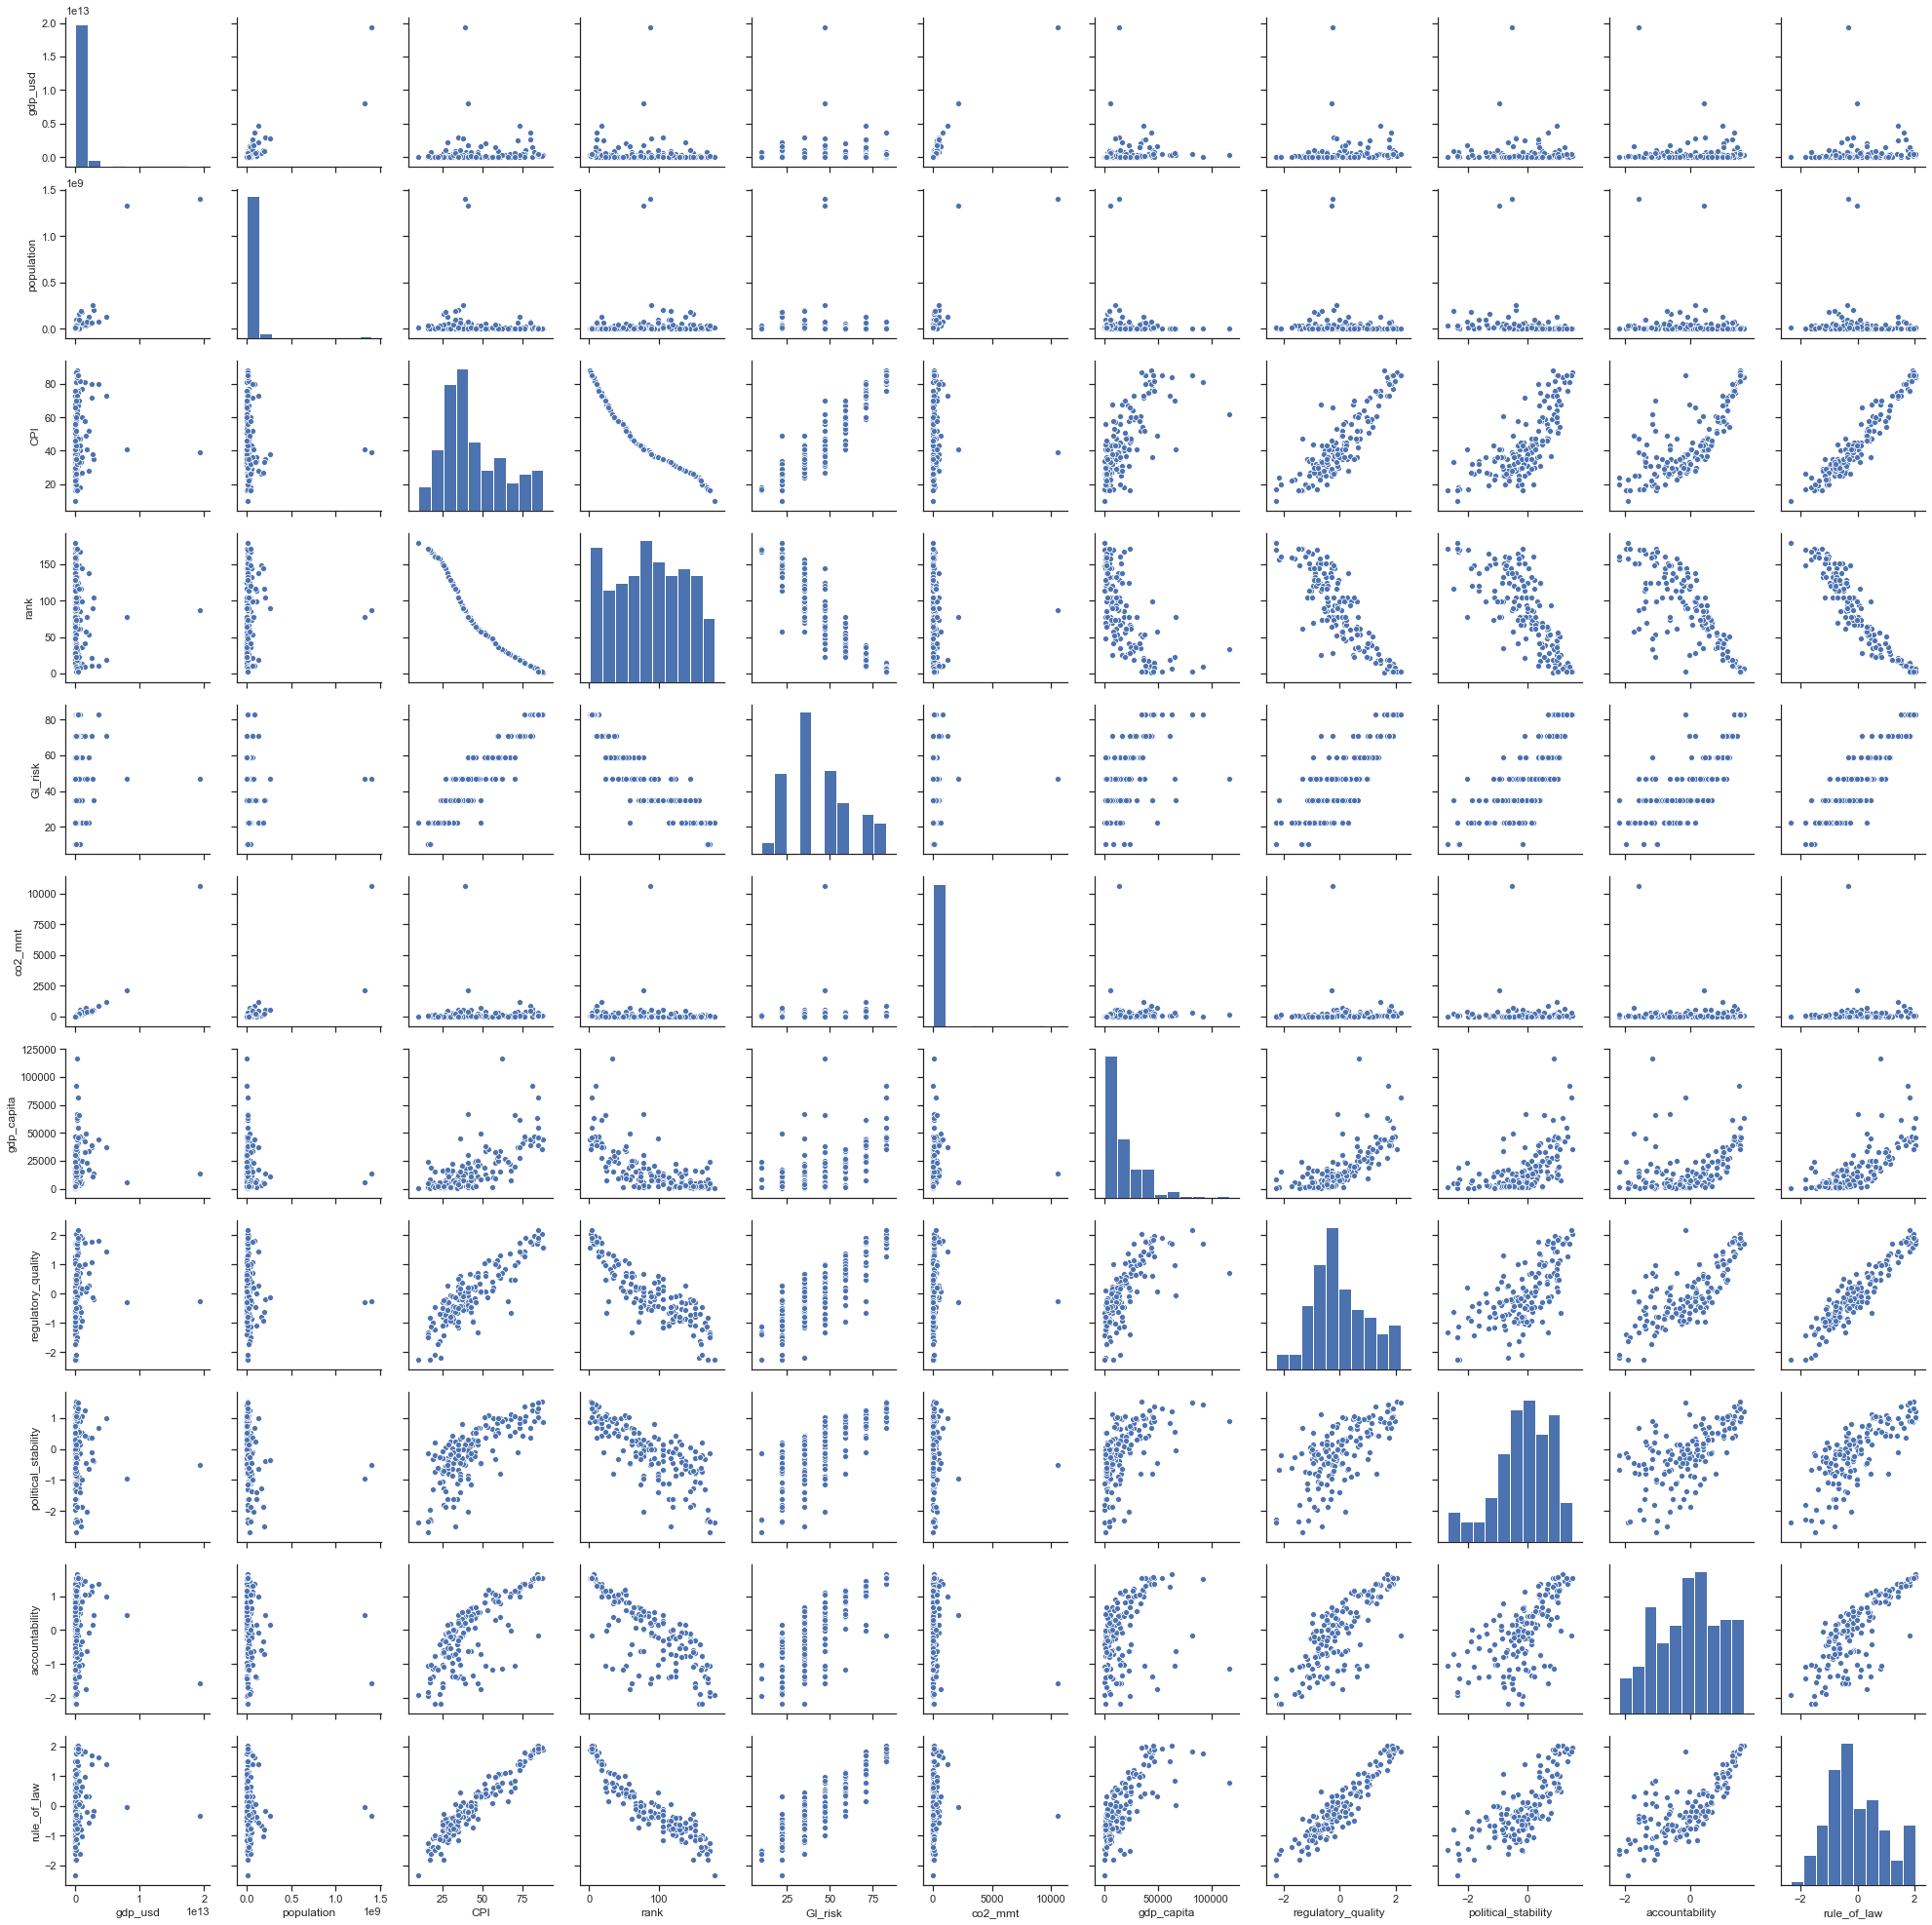

In [32]:

# sns.set(style="ticks")

# # df = sns.load_dataset("iris")
# sns.pairplot(test)
# print('done')

In [34]:
test.columns

Index(['country', 'gdp_usd', 'population', 'CPI', 'rank', 'GI_risk', 'co2_mmt',
       'gdp_capita', 'regulatory_quality', 'political_stability',
       'accountability', 'rule_of_law'],
      dtype='object')

In [44]:
def f(row):
    return row['co2_mmt']/row['population'] * 1000

In [45]:
test['co2_kg_capita'] = test.apply(lambda row: f(row), axis=1)

In [47]:
test.head()

,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita,regulatory_quality,political_stability,accountability,rule_of_law,co2_mmt_capita,co2_kg_capita
0,Afghanistan,5.963890e+10,34600200.0,16,172,10,8.54149,1723.66,-1.327690,-2.671050,-1.039840,-1.498190,2.468624e-07,0.000247
1,Albania,3.087580e+10,2927090.0,36,99,35,4.22116,10548.30,0.189022,0.344645,0.169949,-0.328867,1.442101e-06,0.001442
2,Algeria,5.536240e+11,40563900.0,35,105,35,138.72300,13648.20,-1.171880,-1.097530,-0.863169,-0.857401,3.419863e-06,0.003420
3,Angola,1.768130e+11,28852900.0,19,165,22,21.41700,6128.08,-1.001380,-0.315899,-1.142930,-1.087320,7.422824e-07,0.000742
4,Argentina,7.994760e+11,43897900.0,40,85,35,194.10000,18212.20,-0.469625,0.204626,0.492563,-0.393606,4.421624e-06,0.004422


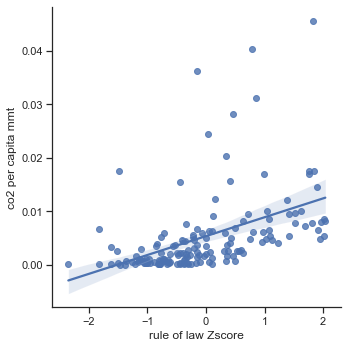

In [48]:
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="rule_of_law", y="co2_kg_capita",
               truncate=True, height=5, data=test)

# Use more informative axis labels than are provided by default
g.set_axis_labels("rule of law Zscore", "co2 per capita mmt")

In [ ]:
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="rule_of_law", y="co2_kg_capita",
               truncate=True, height=5, data=test)

# Use more informative axis labels than are provided by default
g.set_axis_labels("rule of law Zscore", "co2 per capita mmt")

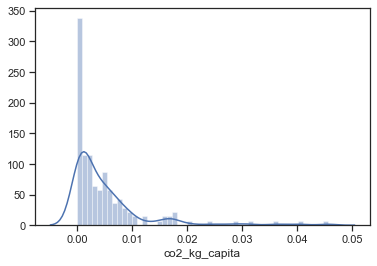

In [50]:

ax = sns.distplot(test['co2_kg_capita'], bins=50)